# Conversion Data

### Goal:
The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve revenue.
### Data Description
* country : user country based on the IP address
* age : user age. Self-reported at sign-in step
* new_user : whether the user created the account during this session or had already an account and simply came back to the site
* source : marketing channel source
* Ads: came to the site by clicking on an advertisement
* Seo: came to the site by clicking on search results
* Direct: came to the site by directly typing the URL on the browser
total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
* converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cd = pd.read_csv('/Users/reggieyang/Dropbox/Semester C/Take Home Challenges/Project Challenges/1. Conversion data/conversion_data.csv')

In [3]:
#find if there is any null value
cd.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [4]:
cd.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Inspect the data

In [5]:
cd.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
cd[cd['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [7]:
cd['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

There is no obvious outliers in this dataset. For 2 rows above, there is some chance that users may have that age. So we keep it for later analysis.

## Descriptive Analysis

#### 1. Source vs Converted

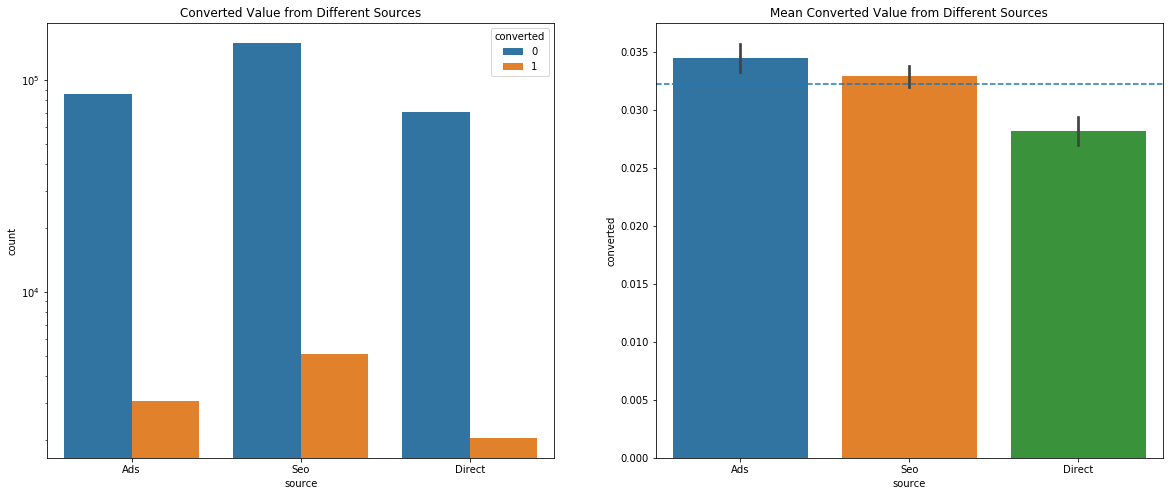

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
sns.countplot(x="source",hue="converted", data=cd,ax=ax[0]) 
ax[0].set_title("Converted Value from Different Sources")
ax[0].set_yscale('log')
sns.barplot(x="source",y='converted',data=cd,ax=ax[1])
ax[1].set_title("Mean Converted Value from Different Sources")
ax[1].axhline(cd['converted'].mean(),ls="--")



#### 2. New user vs Converted

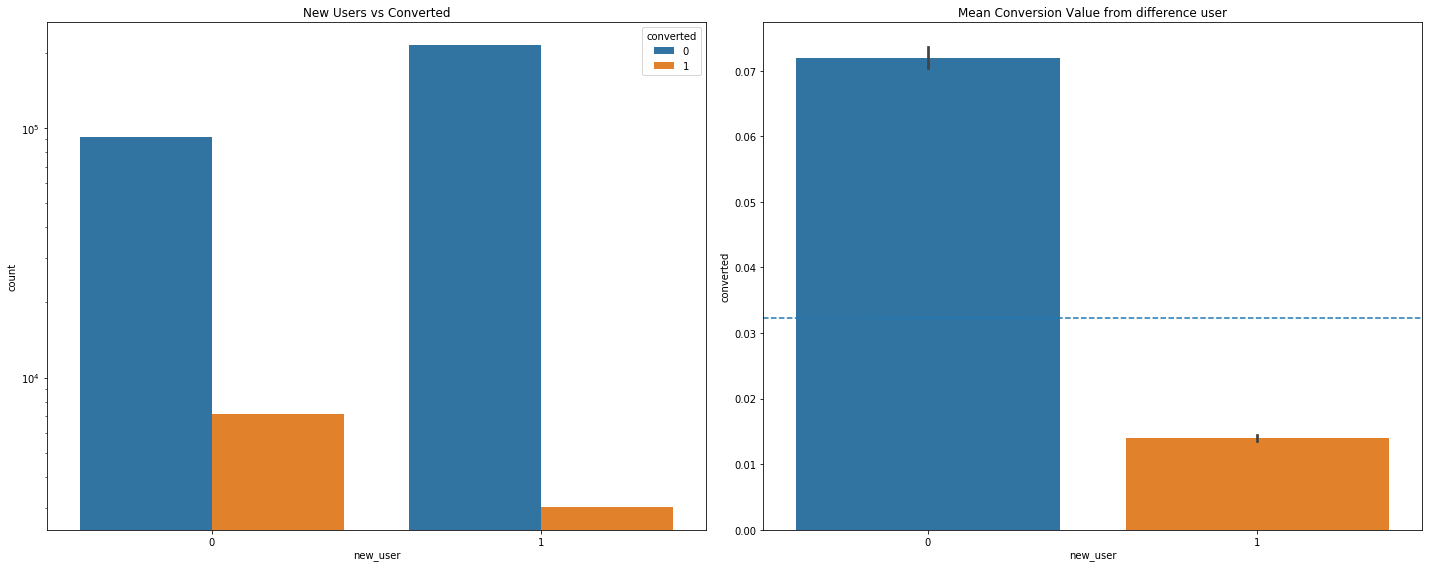

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
sns.countplot(x="new_user",hue="converted",data=cd,ax=ax[0])
ax[0].set_title("New Users vs Converted")
ax[0].set_yscale("log")
sns.barplot(x="new_user",y="converted",data=cd,ax=ax[1])
ax[1].set_title("Mean Conversion Value from difference user")
ax[1].axhline(cd['converted'].mean(),ls="--")
plt.tight_layout()

#### 3. Country vs Converted

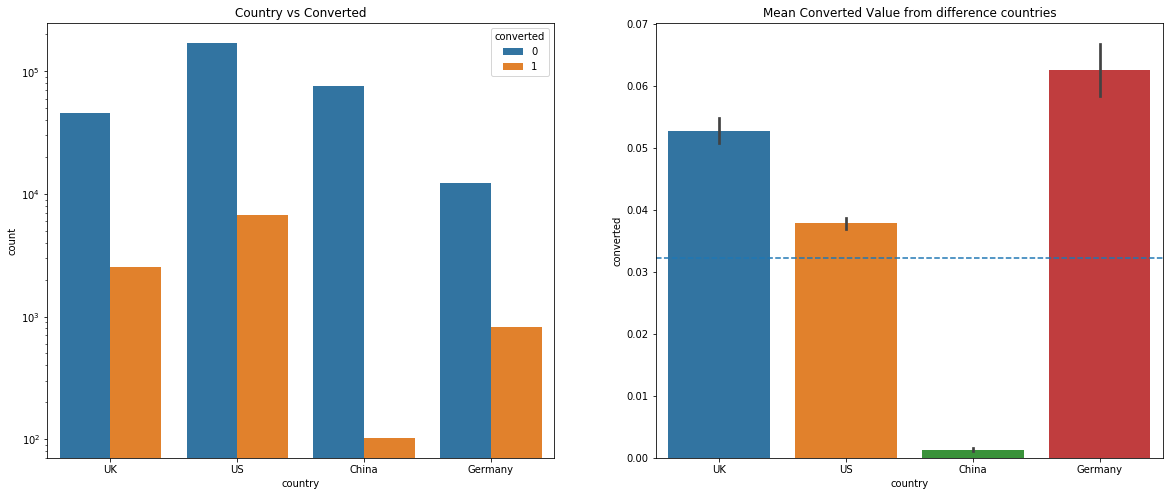

In [10]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(20,8))
sns.countplot(x="country",hue="converted",data=cd,ax=ax[0])
ax[0].set_title("Country vs Converted")
ax[0].set_yscale('log')
sns.barplot(x='country',y='converted',data=cd,ax=ax[1])
ax[1].set_title("Mean Converted Value from difference countries")
plt.axhline(cd['converted'].mean(),ls='--')

#### 4. Age vs Converted

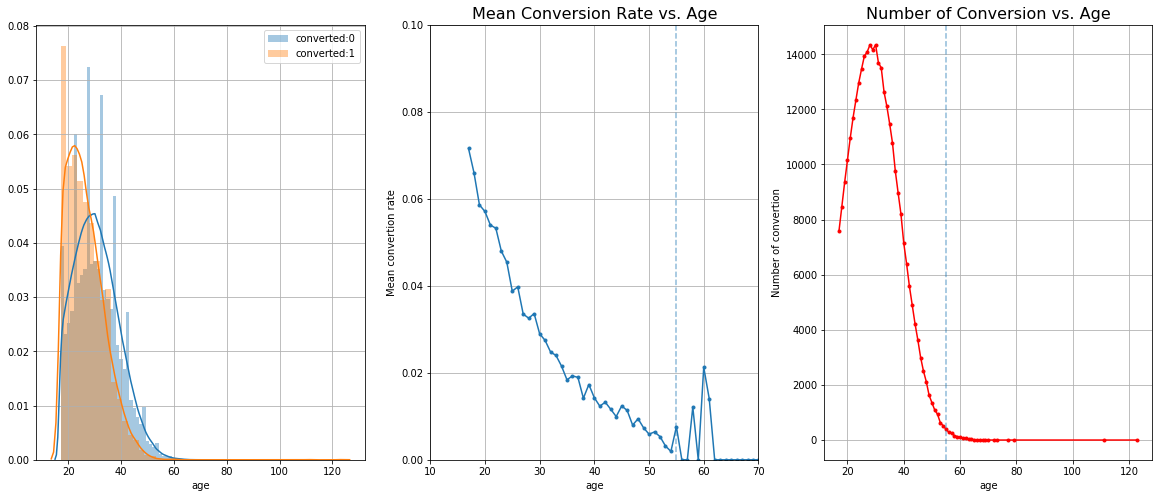

In [11]:
grouped_age = cd[['age','converted']].groupby('age').agg(['mean','count'])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.distplot(cd[cd['converted']==0]['age'],label='converted:0',ax=ax[0])
sns.distplot(cd[cd['converted']==1]['age'],label='converted:1',ax=ax[0])
ax[0].legend()
ax[0].grid(True)

ax[1].plot(grouped_age.index, grouped_age['converted']['mean'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
ax[1].set_xlim(10,70)
ax[1].set_ylim(0,0.1)
ax[1].axvline(55, 0,alpha=0.5,ls='--')

ax[2].plot(grouped_age.index, grouped_age['converted']['count'], '.-',color='red')
ax[2].grid(True)
ax[2].set_title('Number of Conversion vs. Age', fontsize=16)
ax[2].set_xlabel('age')
ax[2].set_ylabel('Number of convertion')
ax[2].axvline(55, 0,alpha=0.5,ls='--')


#### 4. Total Page vs Converted


Text(0.5, 0, 'Age')

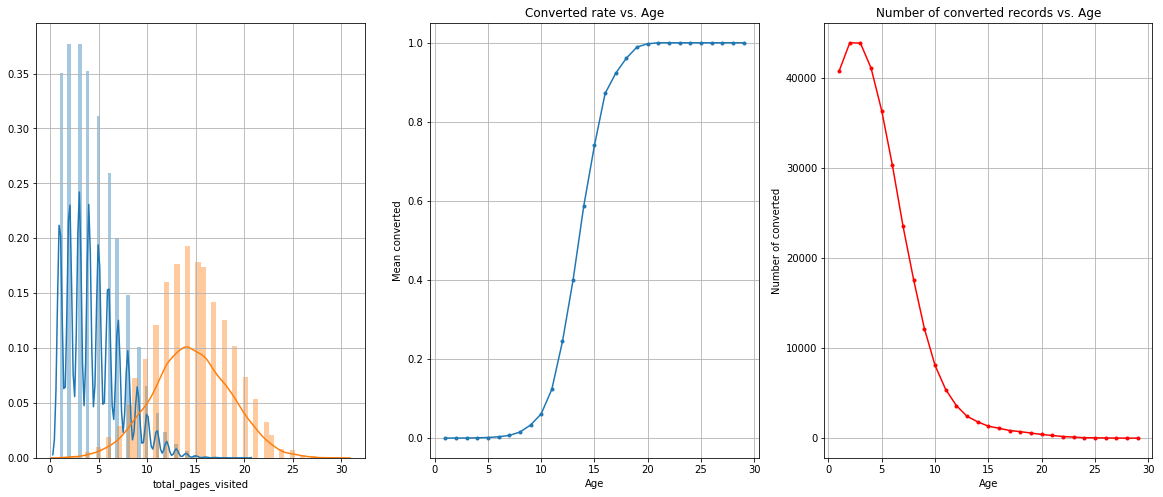

In [12]:
grouped_page = cd[['total_pages_visited','converted']].groupby('total_pages_visited').agg(['mean','count'])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.distplot(cd[cd['converted']==0]['total_pages_visited'],label='converted:0',ax=ax[0])
sns.distplot(cd[cd['converted']==1]['total_pages_visited'],label='converted:1',ax=ax[0])
ax[0].grid(True)

ax[1].plot(grouped_page.index,grouped_page['converted']['mean'],'.-')
ax[1].grid(True)
ax[1].set_title('Converted rate vs. Age')
ax[1].set_ylabel('Mean converted')
ax[1].set_xlabel('Age')

ax[2].plot(grouped_page.index,grouped_page['converted']['count'],'.-',color='red')
ax[2].grid(True)
ax[2].set_title('Number of converted records vs. Age')
ax[2].set_ylabel('Number of converted')
ax[2].set_xlabel('Age')




# Mahine Learning

#### Logistic Regression

In [13]:
cd['new_user'] = cd['new_user'].astype(str)
cd['converted'] = cd['converted'].astype(str)

dataframe=cd.copy()

In [14]:

X = dataframe.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)


In [15]:
y = dataframe.loc[:,'converted']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.333)

In [17]:
#this data set is imbalaced, so we need to use smote to oversample the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


In [18]:
X_train_res = pd.DataFrame(X_train_res)
X_train_res.columns = X_train.columns

In [19]:
#test if data is balanced
unique, counts = np.unique(y_train_res, return_counts=True)
dict(zip(unique, counts))

{'0': 244843, '1': 244843}

In [20]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_res, y_train_res.ravel())

/Users/reggieyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[58303  2854]
 [  181  1902]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     61157
           1       0.40      0.91      0.56      2083

    accuracy                           0.95     63240
   macro avg       0.70      0.93      0.77     63240
weighted avg       0.98      0.95      0.96     63240



In [24]:
classifier.coef_[0]

array([ -0.10147788,   0.8325376 , -12.33589188,  -6.97665254,
        -6.45542203,  -6.46414806,  -5.80263128,  -7.67044052,
        -7.12003404,  -7.48693055,  -6.95905309])

In [25]:
feat_importances = pd.DataFrame({"name":X_train_res.columns,"coef":classifier.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
2,country_China,-12.335892,12.335892
7,new_user_1,-7.670441,7.670441
9,source_Direct,-7.486931,7.486931
8,source_Ads,-7.120034,7.120034
3,country_Germany,-6.976653,6.976653
10,source_Seo,-6.959053,6.959053
5,country_US,-6.464148,6.464148
4,country_UK,-6.455422,6.455422
6,new_user_0,-5.802631,5.802631
1,total_pages_visited,0.832538,0.832538


### Random Forest

In [26]:
cd['converted'] = cd['converted'].astype(int)
cd['new_user'] = cd['new_user'].astype(str)
features= pd.get_dummies(cd)


In [27]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = cd['converted']
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop("converted",axis=1)
# Saving feature names for later use
#feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)


In [28]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [29]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (237150, 11)
Training Labels Shape: (237150,)
Testing Features Shape: (79050, 11)
Testing Labels Shape: (79050,)


In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 20)
# Train the model on training data
rf.fit(train_features, train_labels);

In [31]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 0.02


In [32]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: -inf %.


In [33]:
feature_list=train_features.columns

In [34]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: total_pages_visited  Importance: 0.76
Variable: age                  Importance: 0.09
Variable: country_China        Importance: 0.04
Variable: new_user_1           Importance: 0.03
Variable: new_user_0           Importance: 0.02
Variable: country_Germany      Importance: 0.01
Variable: country_UK           Importance: 0.01
Variable: country_US           Importance: 0.01
Variable: source_Ads           Importance: 0.01
Variable: source_Direct        Importance: 0.01
Variable: source_Seo           Importance: 0.01
